## apply facial landmark detection 

Found 2 faces in the file C:\Users\Patrick\Learning\Computer Vision\test5.jpg'
 Face #1 found at Left: 724 Top: 104 Right: 832 Bottom: 211
 Face #2 found at Left: 450 Top: 68 Right: 557 Bottom: 175


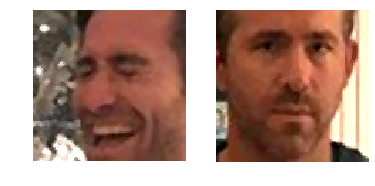

In [2]:
#code to apply facial landmark detection 
import sys
import matplotlib.pyplot as plt
from PIL import Image
import dlib
from skimage import io

file_name = 'test5.jpg'

predictor_model = "shape_predictor_68_face_landmarks.dat"

image = io.imread(file_name)
face_detector = dlib.get_frontal_face_detector()

face_pose_predictor=dlib.shape_predictor(predictor_model)

detected_faces = face_detector(image, 1) 
print(f"Found {len(detected_faces)} faces in the file {file_name}'")

win = dlib.image_window()
win.set_image(image)

for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)
    

    x=face_rect.left()
    y=face_rect.top()
    x2=face_rect.right()
    y2=face_rect.bottom()  
    print(f' Face #{i+1} found at Left: {x} Top: {y} Right: {x2} Bottom: {y2}')
    
    face = Image.fromarray(image).crop((x,y,x2,y2))
    
    plt.figure(1)
    plt.subplot(1, len(detected_faces), i+1)
    plt.axis('off')
    plt.imshow(face)       

    pose_landmarks = face_pose_predictor(image, face_rect)
    
    win.add_overlay(pose_landmarks)    
    
dlib.hit_enter_to_continue()

from PIL import ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

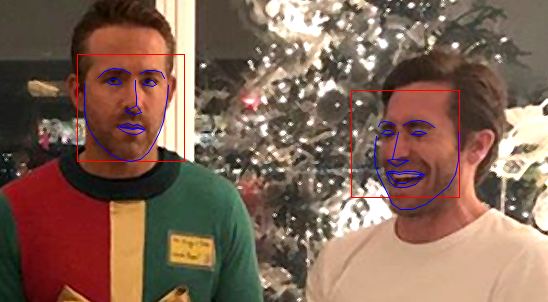

<br/>

## apply image transforming

Found 2 faces in the file H:\googledrive\Learning\Computer Vision\test5.jpg'
 Face #1 found at Left: 733 Top: 116 Right: 822 Bottom: 206
 Face #2 found at Left: 450 Top: 68 Right: 557 Bottom: 175


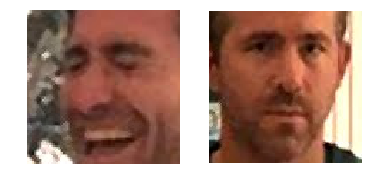

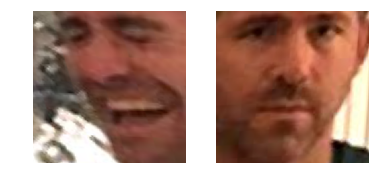

In [4]:
import sys
from PIL import Image
import dlib
import matplotlib.pyplot as plt
import matplotlib

from skimage import io
import align_dlib as openface
import cv2

file_name = 'test5.jpg'
predictor_model = "shape_predictor_68_face_landmarks.dat"

image = io.imread(file_name)
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor=dlib.shape_predictor(predictor_model)

face_aligner = openface.AlignDlib(predictor_model)
detected_faces = face_detector(image, 1) 

print(f"Found {len(detected_faces)} faces in the file {file_name}'")

win = dlib.image_window()
win.set_image(image)

for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)
    
    x=face_rect.left()
    y=face_rect.top()
    x2=face_rect.right()
    y2=face_rect.bottom()  
    print(f' Face #{i+1} found at Left: {x} Top: {y} Right: {x2} Bottom: {y2}')   
       
    face = Image.fromarray(image).crop((x,y,x2,y2))
    
    plt.figure(1)
    plt.subplot(1, len(detected_faces), i+1)
    plt.axis('off')
    plt.imshow(face)       

    pose_landmarks = face_pose_predictor(image, face_rect)
    
    win.add_overlay(pose_landmarks)   
    
    alignedFace = face_aligner.align(534, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
    
    plt.figure(2)
    plt.subplot(1, len(detected_faces), i+1)
    plt.axis('off')
    plt.imshow(alignedFace) 

    matplotlib.image.imsave(f"aligned_face_{i}.jpg", alignedFace)
  
    
dlib.hit_enter_to_continue()

## convert face img into embedding

In [3]:
#convert face img into embedding
from PIL import Image, ImageDraw
import face_recognition_models
import dlib
import numpy as np
from skimage import io

file_name = "1.jpg"
ezra_image = io.imread(file_name)

face_detector = dlib.get_frontal_face_detector()
predictor_5_point_model = face_recognition_models.pose_predictor_five_point_model_location()
pose_predictor_5_point = dlib.shape_predictor(predictor_5_point_model)

detected_faces= face_detector(ezra_image)
pose_predictor = pose_predictor_5_point

raw_landmarks=[pose_predictor(ezra_image, face_rect) for face_rect in detected_faces]
face_recognition_model = face_recognition_models.face_recognition_model_location()
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)

num_jitters=1

ezra_face_encoding=[np.array(face_encoder.compute_face_descriptor(ezra_image, raw_landmark_set, num_jitters)) for raw_landmark_set in raw_landmarks]
ezra_face_encoding

[array([-0.11034177,  0.09402622,  0.10892466, -0.00202444, -0.16990446,
        -0.08280568, -0.09934285, -0.04905307,  0.04735805, -0.02569977,
         0.32339871, -0.08205494, -0.18166772, -0.04497697, -0.05120343,
         0.12370504, -0.17021021, -0.1658501 , -0.01279452, -0.01353466,
         0.13310991,  0.05634496, -0.06831303,  0.10412688, -0.15261853,
        -0.32587564, -0.03708751, -0.08332246,  0.09398178, -0.1188201 ,
         0.0120476 , -0.00847146, -0.16141689, -0.02122385,  0.01968438,
         0.06224108, -0.02776869, -0.05914126,  0.21160585, -0.02343476,
        -0.26274484,  0.0938444 ,  0.03352647,  0.33359182,  0.1897531 ,
         0.02190199,  0.06194769, -0.06610168,  0.12145381, -0.27726382,
         0.14401086,  0.20449845,  0.20272988, -0.00760617,  0.07663268,
        -0.16297071, -0.06709486,  0.19394197, -0.24257118,  0.13603784,
         0.08998028,  0.01052466,  0.07717365, -0.14196472,  0.12534377,
         0.09327521, -0.12472224, -0.13228375,  0.0